In [ ]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 907 kB 5.1 MB/s 


In [ ]:
import warnings
import numpy as np
import pandas as pd
from random import gauss
from arch import arch_model
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('accidental-deaths-in-usa-monthly.csv')

In [ ]:
data.columns = ['Month', 'Deaths']
data.head()

,Month,Deaths
0,1973-01,9007
1,1973-02,8106
2,1973-03,8928
3,1973-04,9137
4,1973-05,10017


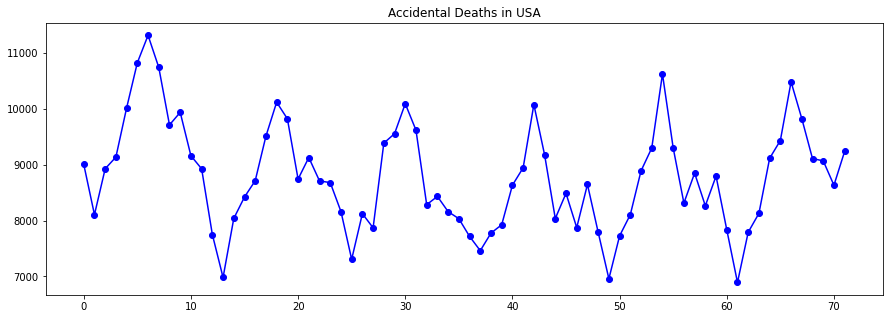

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data.Deaths, marker='o', color='b')
plt.title('Accidental Deaths in USA')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   72 non-null     object
 1   Deaths  72 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
data['Month2'] = pd.to_datetime(data['Month'], yearfirst=True)
data.head()

,Month,Deaths,Month2
0,1973-01,9007,1973-01-01
1,1973-02,8106,1973-02-01
2,1973-03,8928,1973-03-01
3,1973-04,9137,1973-04-01
4,1973-05,10017,1973-05-01


We can observe from the plot that the data is not volatile. Thus, using a GARCH model on the data might not be very effective. 

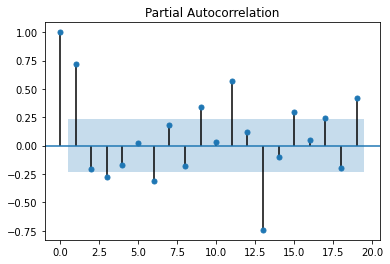

In [ ]:
plot_pacf(data.Deaths**2)
plt.show()

In [ ]:
model = arch_model(data.Deaths, p=1, q=0)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 594.058595637147
Iteration:      2,   Func. Count:     10,   Neg. LLF: 592.4965423197544
Iteration:      3,   Func. Count:     14,   Neg. LLF: 592.4499395232292
Iteration:      4,   Func. Count:     18,   Neg. LLF: 592.4458306876008
Iteration:      5,   Func. Count:     22,   Neg. LLF: 592.4456601089338
Iteration:      6,   Func. Count:     26,   Neg. LLF: 592.4455353925853
Iteration:      7,   Func. Count:     30,   Neg. LLF: 592.4450078201417
Iteration:      8,   Func. Count:     34,   Neg. LLF: 592.4438080653358
Iteration:      9,   Func. Count:     38,   Neg. LLF: 592.4404905394615
Iteration:     10,   Func. Count:     42,   Neg. LLF: 592.4318427123187
Iteration:     11,   Func. Count:     46,   Neg. LLF: 592.4094059502539
Iteration:     12,   Func. Count:     50,   Neg. LLF: 592.3524479703044
Iteration:     13,   Func. Count:     54,   Neg. LLF: 592.2177309035944
Iteration:     14,   Func. Count:     58,   Neg. LLF: 591.9908516

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -591.728
Distribution:                  Normal   AIC:                           1189.46
Method:            Maximum Likelihood   BIC:                           1196.29
                                        No. Observations:                   72
Date:                Wed, Dec 21 2022   Df Residuals:                       71
Time:                        20:02:34   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          8623.8659    214.572     40.191      0.000 [8.203e+03,9.044e+03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.5283e+05  2.231e+05      2.029  4.242e-02 [1.549e+04,8.902e+05]
alpha[1]       0.5613      0.402      1.396      0.163     [ -0.226,  1.349]
============================================================================

Covariance estimator: robust
"""

In [ ]:
rollingPredictions = []
test_size = 30

In [ ]:
for i in range(test_size):
    train = data.Deaths[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp = 'off')
    pred = model_fit.forecast(horizon = 1)
    rollingPredictions.append(np.sqrt(pred.variance.values[-1:][0]))

In [ ]:
rollingPredictions = pd.Series(rollingPredictions, index = data.Deaths.index[-test_size:])

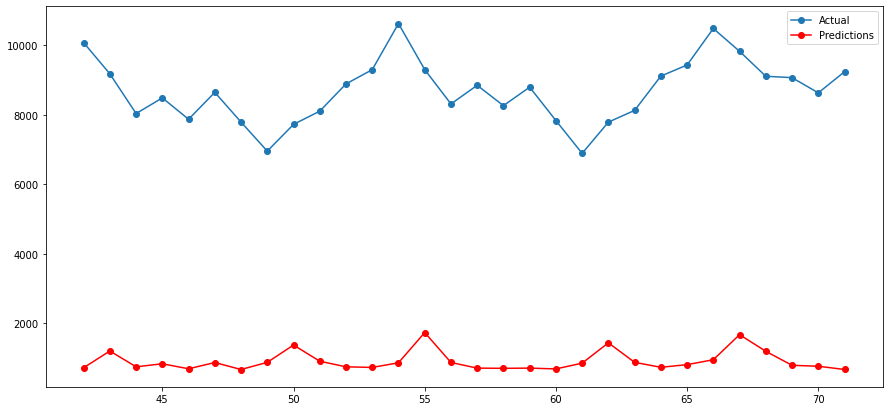

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(data.Deaths[-test_size:], marker = 'o')
plt.plot(rollingPredictions, color='r', marker='o')
plt.legend(['Predictions', 'Actual'][::-1], loc = 'best')
plt.show()

As expected, the GARCH model is not suitable to be used on this dataset, as represented by the graph above. 